## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [28]:
student_df_orig = pd.read_csv('students-data.csv', delimiter=';',skipinitialspace=True)
student_df_orig.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [29]:
student_df = pd.DataFrame.copy(student_df_orig)
student_df.index.rename('number')
student_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [30]:
print(student_df.select_dtypes(include=['object']).columns)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [31]:
threshold = 1
student_df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [32]:
print(student_df.var()[student_df.var() < threshold].index.values) # we have 6 columns with variability less than 1

['traveltime' 'studytime' 'failures' 'famrel' 'freetime' 'Dalc']


In [33]:
student_df.drop(student_df.var()[student_df.var() < threshold].index.values, axis=1,inplace= True)

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [34]:
lbe = preprocessing.LabelEncoder()

In [35]:
# Categorical boolean mask
categorical_feature_mask = student_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = student_df.columns[categorical_feature_mask].tolist()

In [36]:
# apply the categorical feature columns
student_df[categorical_cols] = student_df[categorical_cols].apply(lambda col: lbe.fit_transform(col))
student_df[categorical_cols].head(10)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
5,0,1,1,1,1,3,2,3,1,0,1,1,1,1,1,1,0
6,0,1,1,1,1,2,2,1,1,0,0,0,0,1,1,1,0
7,0,0,1,0,0,2,4,1,1,1,1,0,0,1,1,0,0
8,0,1,1,1,0,3,2,1,1,0,1,1,0,1,1,1,0
9,0,1,1,0,1,2,2,1,1,0,1,1,1,1,1,1,0


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [37]:
# for Grades G1, G2 and G3 with score < 10 then it is Fail(0) and G1, G2, G3 with score >= 10 --> Pass(1)
student_df.loc[(student_df['G1']< 10),'G1'] = 0
student_df.loc[(student_df['G1']>= 10),'G1'] = 1
student_df.loc[(student_df['G2']< 10),'G2'] = 0
student_df.loc[(student_df['G2']>= 10),'G2'] = 1
student_df.loc[(student_df['G3']< 10),'G3'] = 0
student_df.loc[(student_df['G3']>= 10),'G3'] = 1
print(student_df_orig.head())
student_df.head()

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [38]:
student_df.groupby(["G3"]).count()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
G3,,,,,,,,,,,,,,,,,,,,,
0,130,130,130,130,130,130,130,130,130,130,...,130,130,130,130,130,130,130,130,130,130
1,265,265,265,265,265,265,265,265,265,265,...,265,265,265,265,265,265,265,265,265,265


In [39]:
# Divide the Data in to Target and Features
y = student_df['G3'] # Target Variable
X = student_df.drop(['G3'],axis=1) # Independent Variables

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

<IPython.core.display.Javascript object>

(27.0, 0.0)

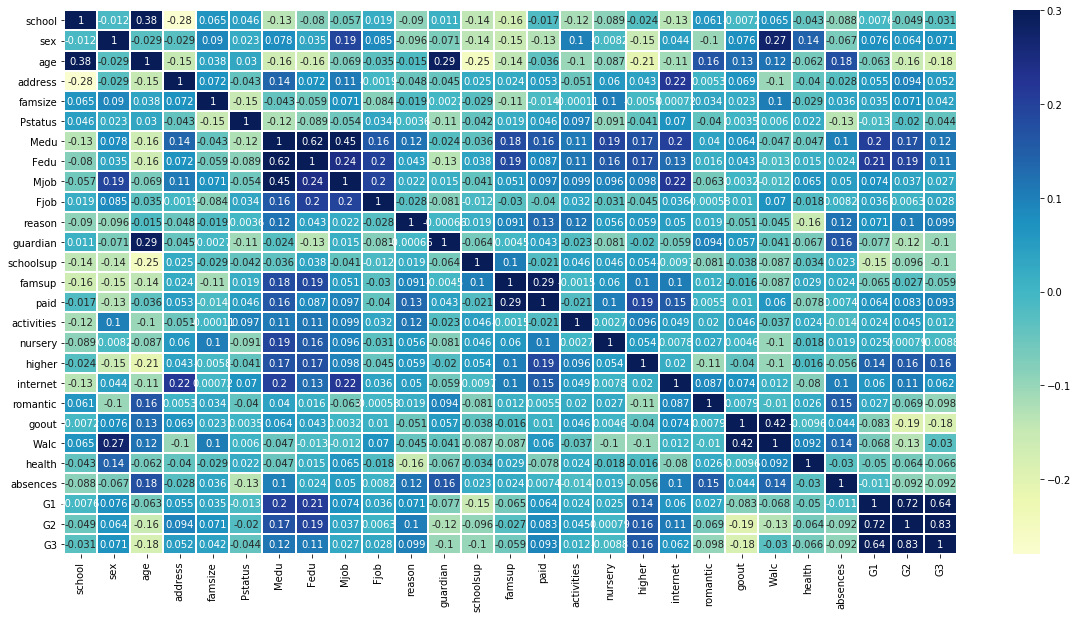

In [40]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(student_df.corr(),vmax=.3, center=0, annot = True,linewidths=1, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# G2 and G3 has a strong positive correlation which indicates the G2 increases the G3 grades increase as well  r= 0.83

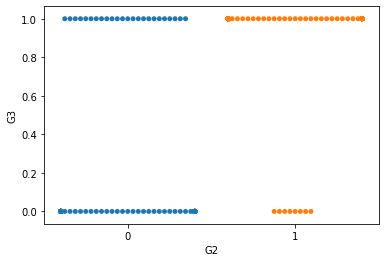

In [41]:
sns.swarmplot(x = 'G2', y ='G3', data = student_df)
# the below plot indicates that student who is categorized passed in G2 has most of the times passed in G3,
# although there are few outliers


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

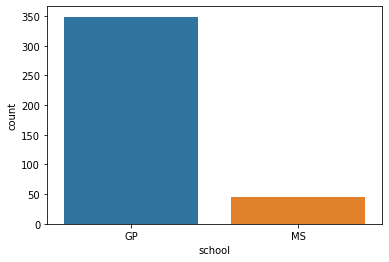

In [42]:
sns.countplot(x='school', data = student_df_orig)

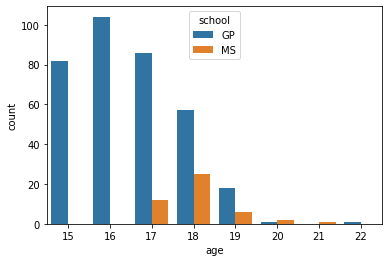

In [43]:
sns.countplot(x='age', data = student_df_orig, hue = "school")

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.24,random_state = 10)
print(X_train.count())
print(X_test.count())

school        300
sex           300
age           300
address       300
famsize       300
Pstatus       300
Medu          300
Fedu          300
Mjob          300
Fjob          300
reason        300
guardian      300
schoolsup     300
famsup        300
paid          300
activities    300
nursery       300
higher        300
internet      300
romantic      300
goout         300
Walc          300
health        300
absences      300
G1            300
G2            300
dtype: int64
school        95
sex           95
age           95
address       95
famsize       95
Pstatus       95
Medu          95
Fedu          95
Mjob          95
Fjob          95
reason        95
guardian      95
schoolsup     95
famsup        95
paid          95
activities    95
nursery       95
higher        95
internet      95
romantic      95
goout         95
Walc          95
health        95
absences      95
G1            95
G2            95
dtype: int64


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [45]:
# Fit the model on 76%
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.savetxt("pred.csv", y_pred)
coef_df = pd.DataFrame(model.coef_, columns= X_train.columns)
coef_df['intercept'] = model.intercept_
print(coef_df)

     school       sex       age   address   famsize   Pstatus      Medu  \
0  0.096396 -0.008057 -0.163501 -0.135106 -0.120207 -0.458031  0.055849   

       Fedu      Mjob      Fjob  ...    higher  internet  romantic     goout  \
0 -0.132125 -0.082376  0.247654  ...  0.762632  0.327521 -0.580431 -0.391404   

      Walc    health  absences        G1        G2  intercept  
0  0.45824 -0.011671 -0.007755  1.770912  3.845101   0.315773  

[1 rows x 27 columns]


D:\Users\anand\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_pred))

0.8736842105263158
[[24  5]
 [ 7 59]]


In [47]:
# The F1 Score is the 2*((precision*recall)/(precision+recall)). It is also called the F Score or the F Measure. 
# Put another way, the F1 score conveys the balance between the precision and the recall.
print(metrics.classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred, average=None))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.92      0.89      0.91        66

    accuracy                           0.87        95
   macro avg       0.85      0.86      0.85        95
weighted avg       0.88      0.87      0.87        95

[0.8        0.90769231]


# Naive bayes with Iris data

### Import Iris.csv

In [48]:
Iris_df_orig = pd.read_csv("iris.csv")
Iris_df = pd. DataFrame.copy(Iris_df_orig)

In [49]:
Iris_df = Iris_df.drop('Id',axis=1)
Iris_df.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
Iris_df['Species'] = Iris_df['Species'].astype('category') # Converting the Class object to Category type
lb_Species = LabelEncoder()
Iris_df['Species'] = lb_Species.fit_transform(Iris_df["Species"])

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [51]:
y = Iris_df['Species'] # target variable
X = Iris_df.drop('Species',axis=1) # Independent Variables
Iris_df.groupby(["Species"]).count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


### Find the distribution of target variable (Class)

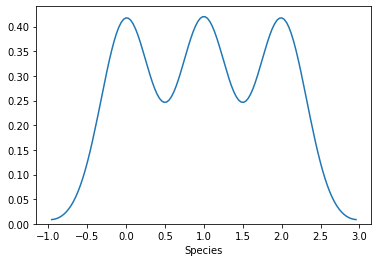

In [52]:
sns.distplot(y, hist = False, kde = True) 
# Multi-modal distribution with Species Iris-setosa - 0, Iris-Versicolor - 1 and Iris- Virginica -2

### Plot the distribution of target variable using histogram

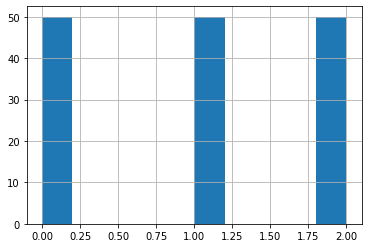

In [53]:
Iris_df['Species'].hist() # Species 0,1, and 2 are equally distributed - histogram

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

D:\Users\anand\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Users\anand\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


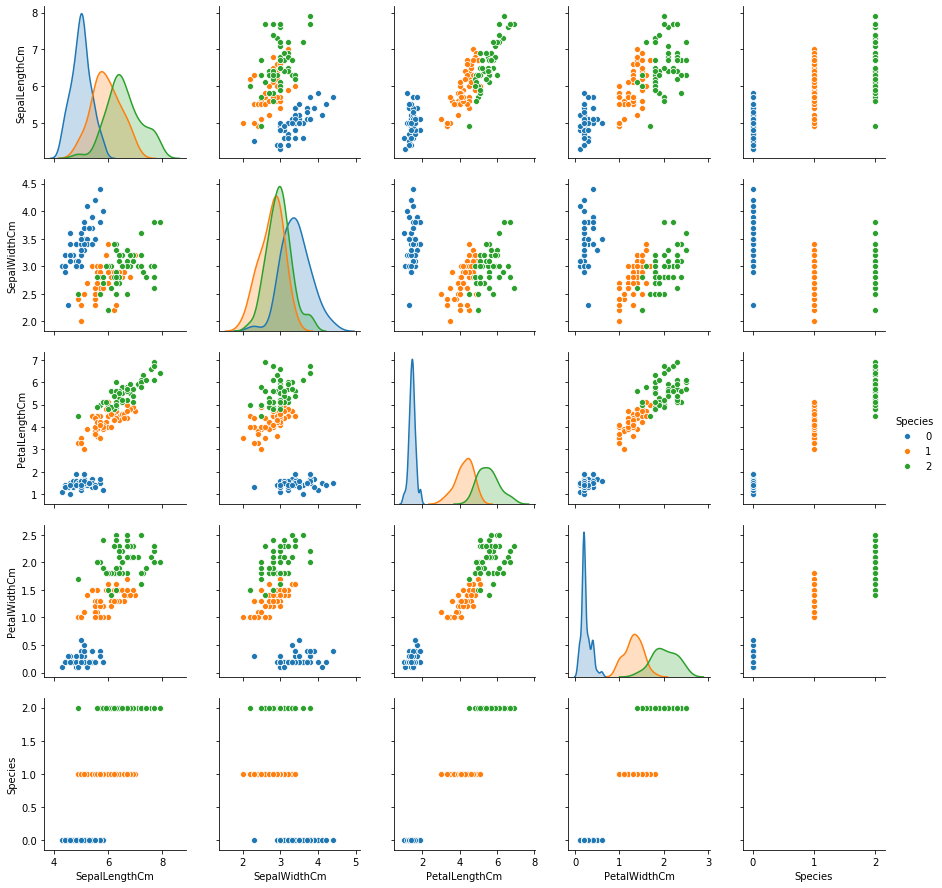

In [54]:
sns.pairplot(Iris_df, hue="Species")
# All the 4 independent variables or features show a multi modal distribution which is classic 
# when you have clusters of data between 3 species
# Sepal length and Sepal width are more or less symmetrical
# Petal width and Petal width must have multi-modal distribution with some skewness

### Summary Statistics and explain insights for at least 2 variables

In [55]:
Iris_df.describe(include ="all").transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5
Species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


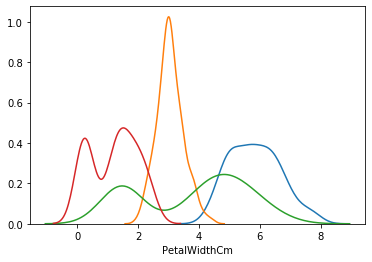

In [56]:
# Sepal Length is more or less symmetrical with Mean ~Median~ Mode i.e 5.84~5.8~5.0 for all the species
# Sepal Width is more or less symmetrical with Mean ~Median~ Mode i.e 3.05~3.00~3.0 for all the species
# Petal Length has Median > Mean i.e 4.35 > 3.75 which explains the outliers and slighly left skewed distribution
# Petal width also has Median > Mean which explains the outliers and slightly left skewed distribution
sns.distplot(Iris_df['SepalLengthCm'], hist = False)
sns.distplot(Iris_df['SepalWidthCm'], hist = False)
sns.distplot(Iris_df['PetalLengthCm'], hist = False) # multi-modal distribution
sns.distplot(Iris_df['PetalWidthCm'], hist = False) # Multi-modal distribution

### Correlation among all variables and give your insights

(5.0, 0.0)

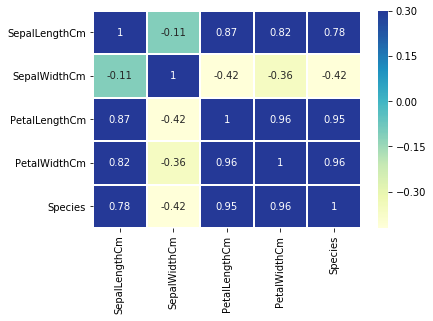

In [57]:
ax = sns.heatmap(Iris_df.corr(),vmax=.3, center=0, annot = True,linewidths=1, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# Sepal Length, Petal length and Petal width have stong positve correlation
# Sepal length have weak correlation with all the other variables
# Species can be identified using Petal parameters more than sepal parameters

### Split data in Training and Validation in 80:20

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 10)

### Do Feature Scaling

In [59]:
#scale the dimensions using Zscores
#X = preprocessing.scale(X)
# scaling is not required as all of them are in the same units

### Train and Fit NaiveBayes Model

In [60]:
model = GaussianNB()
model.fit(X_train, y_train.ravel())
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [61]:
# make predictions
trainpred = model.predict(X_train)

In [62]:
# make predictions
testpred = model.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [63]:
# summarize the fit of the model for Training Data
print(metrics.classification_report(y_train, trainpred))
print(metrics.confusion_matrix(y_train, trainpred))
# currently the prediction of the model is 95% for training data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.92      0.92      0.92        37
           2       0.93      0.93      0.93        43

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

[[40  0  0]
 [ 0 34  3]
 [ 0  3 40]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



(3.0, 0.0)

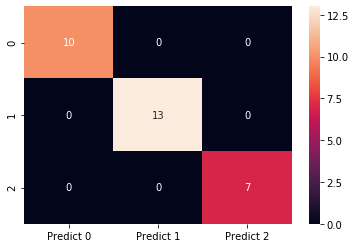

In [64]:
# summarize the fit of the model for Test Data
print(metrics.classification_report(y_test, testpred))
cm = metrics.confusion_matrix(y_test, testpred)
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1","2"]], columns = [i for i in ["Predict 0","Predict 1","Predict 2"]])
ax = sns.heatmap(df_cm, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# currently the prediction of the model is 100% which may be clear case of less sample size and over-fitting of data

In [65]:
# --Iteration 2 by removing the SepalLength Column
y = Iris_df['Species'] # target variable
X = Iris_df.drop(['Species','SepalLengthCm'],axis=1) # Independent Variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 10)
# Creating the Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [66]:
# make predictions
expected =y_test
predicted = model.predict(X_test)
# Metrics and Calculations
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
